## Business Problem
#### Since the regulations on the exhaust gases of industries are becoming stringent as per global warming and international forums,XYZ industry having a gas turbine wants to examine the optimum operation mode for its gas turbine according to controlled emissions of CO and NOX.The organization wants to control its emmisions but does not want to compromise on the energy yeild of the turbine,hence needs a optimum level where yeild is at optimum level while emmissions are low.The organization has provided the data of the readings measured by sensors at different points of turbine,inlet and exhaust.The organization wants the turbine to be operated at optimum level with low emissions possible.
#### So we are using this sensor readings and clustering them using K-Means clustering,which will give us the sensor readings at different clustered levels of emissions,so that the turbine can be fine tuned and operated with those readings obtained.


#### Importing required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)

#### Reading data

In [10]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\gas turbine dataset.csv')

In [11]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.51860,79.559
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.84700,79.917
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.96320,90.912
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.24940,93.227


#### Checking for null values
#### No null values found

In [4]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Checing for duplicate rows
#### No duplicate rows found

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7411 entries, 0 to 7410
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7411 non-null   float64
 1   AP      7411 non-null   float64
 2   AH      7411 non-null   float64
 3   AFDP    7411 non-null   float64
 4   GTEP    7411 non-null   float64
 5   TIT     7411 non-null   float64
 6   TAT     7411 non-null   float64
 7   TEY     7411 non-null   float64
 8   CDP     7411 non-null   float64
 9   CO      7411 non-null   float64
 10  NOX     7411 non-null   float64
dtypes: float64(11)
memory usage: 637.0 KB


#### Checking spread of variables as this would highly affect clustering

In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000
mean,17.112261,1014.167883,79.174989,4.090755,25.663721,1084.733909,544.503170,135.745675,12.207578,1.572486,67.575392
std,7.428307,6.293003,13.465898,0.661865,4.325835,16.134972,8.288471,16.209187,1.146561,1.845442,10.683331
min,2.116300,995.790000,34.493000,2.758400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,10.992000,1009.800000,70.428500,3.644750,23.364500,1082.500000,538.560000,130.745000,11.684000,0.726405,60.361500
50%,16.366000,1013.600000,82.129000,4.026300,24.770000,1088.000000,549.860000,133.810000,12.008000,1.155700,65.542000
75%,23.344500,1018.100000,89.778000,4.480350,29.879500,1099.800000,550.040000,148.325000,13.257000,1.754600,74.314500
max,34.532000,1034.200000,100.170000,7.318900,36.003000,1100.600000,550.610000,170.000000,14.851000,43.622000,119.320000


#### Treating outliers- AH,AFDP,TIT,CO

<AxesSubplot:xlabel='AH'>

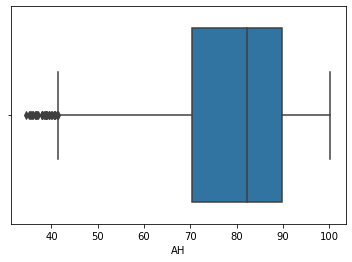

In [19]:
sns.boxplot(df['AH'])

In [21]:
m=np.mean(df.AH)
sd=np.std(df.AH)
print(m+3*sd)
a=(m-3*sd)
a

119.56995797242962


38.78001989830299

In [22]:
df['AH']=np.where(df['AH']<a,a,df['AH'])

<AxesSubplot:xlabel='AH'>

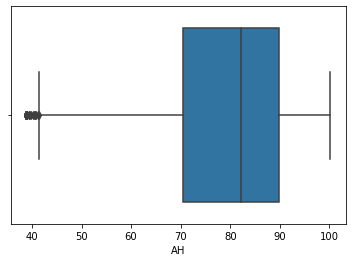

In [23]:
sns.boxplot(df['AH'])

<AxesSubplot:xlabel='AFDP'>

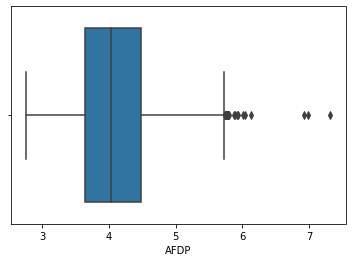

In [24]:
sns.boxplot(df['AFDP'])

In [25]:
m=np.mean(df['AFDP'])
sd=np.std(df['AFDP'])
a=m+3*sd
a

6.076214359822041

In [26]:
df['AFDP']=np.where(df['AFDP']>a,a,df['AFDP'])

<AxesSubplot:xlabel='AFDP'>

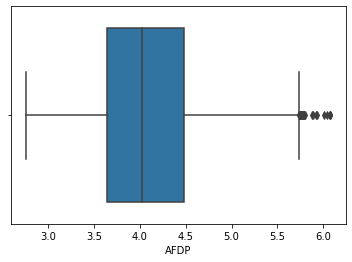

In [27]:
sns.boxplot(df['AFDP'])

<AxesSubplot:xlabel='TIT'>

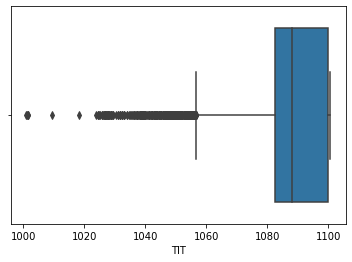

In [28]:
sns.boxplot(df['TIT'])

In [29]:
m=np.mean(df['TIT'])
sd=np.std(df['TIT'])
a=m-3*sd
a

1036.332258701736

In [30]:
df['TIT']=np.where(df['TIT']<a,a,df['TIT'])

<AxesSubplot:xlabel='TIT'>

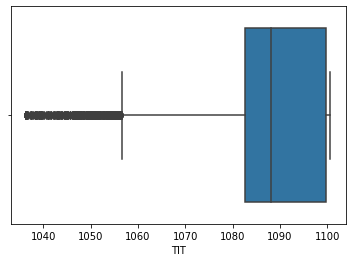

In [31]:
sns.boxplot(df['TIT'])

<AxesSubplot:xlabel='CO'>

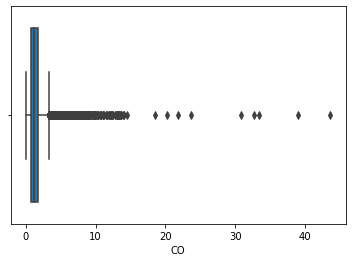

In [32]:
sns.boxplot(df['CO'])

In [33]:
m=np.mean(df['CO'])
sd=np.std(df['CO'])
a=m+3*sd
a

7.108438334292933

<AxesSubplot:xlabel='CO'>

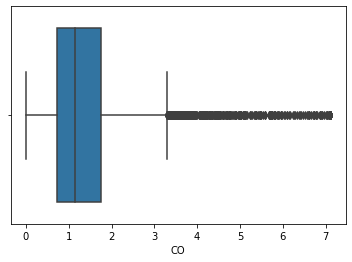

In [34]:
df['CO']=np.where(df['CO']>a,a,df['CO'])
sns.boxplot(df['CO'])

#### Checking spread of variables again

In [35]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
count,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000,7411.000000
mean,17.112261,1014.167883,79.179640,4.090343,25.663721,1084.805083,544.503170,135.745675,12.207578,1.499070,67.575392,0.771421
std,7.428307,6.293003,13.451474,0.660313,4.325835,15.882269,8.288471,16.209187,1.146561,1.309443,10.683331,0.419946
min,2.116300,995.790000,38.780020,2.758400,17.878000,1036.332259,512.450000,100.170000,9.904400,0.000388,27.765000,0.000000
25%,10.992000,1009.800000,70.428500,3.644750,23.364500,1082.500000,538.560000,130.745000,11.684000,0.726405,60.361500,1.000000
50%,16.366000,1013.600000,82.129000,4.026300,24.770000,1088.000000,549.860000,133.810000,12.008000,1.155700,65.542000,1.000000
75%,23.344500,1018.100000,89.778000,4.480350,29.879500,1099.800000,550.040000,148.325000,13.257000,1.754600,74.314500,1.000000
max,34.532000,1034.200000,100.170000,6.076214,36.003000,1100.600000,550.610000,170.000000,14.851000,7.108438,119.320000,1.000000


#### Model Building

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

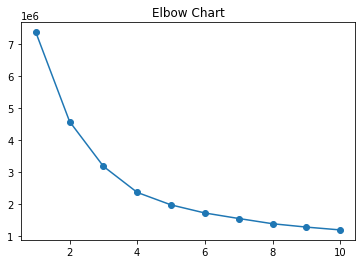

In [38]:
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow Chart")
plt.show()


In [54]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [55]:
df['labels']=kmeans.labels_

In [56]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.518600,79.559,1
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.847000,79.917,1
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.108438,90.912,1
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.249400,93.227,1
7410,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.981600,92.498,1


#### Exporting output into csv

In [69]:
df.to_csv('Gasturbineclusteredoutput.csv')

#### Visualizing Clusters

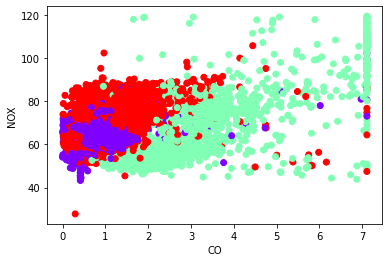

In [57]:
plt.scatter(df['CO'],df['NOX'],c=kmeans.labels_,cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('CO')
plt.ylabel('NOX');

#### Exploring Clusters

In [58]:
df['labels'].value_counts()

2    3605
0    2220
1    1586
Name: labels, dtype: int64

In [66]:
lowCO_lowNOX=df.loc[(df['labels']==0)]
lowCO_lowNOX

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
11,7.9896,1017.9,87.541,4.3905,30.128,1094.5,534.81,152.60,13.333,0.94292,73.286,0
12,9.8712,1017.2,84.249,4.6983,32.341,1100.2,530.58,159.99,13.929,1.04280,70.558,0
13,10.7220,1016.5,80.263,4.7526,32.739,1100.2,528.93,160.60,14.049,1.34840,71.115,0
14,11.0170,1016.3,78.128,4.7440,32.672,1100.1,529.06,160.40,14.018,1.06860,70.107,0
15,10.9460,1016.2,77.960,4.6919,32.424,1100.3,530.67,160.09,13.945,0.21538,67.415,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7321,9.5553,1031.7,79.888,5.2753,33.211,1100.2,525.60,163.52,14.276,0.67902,61.853,0
7322,9.0601,1031.5,83.010,5.3986,33.816,1100.0,523.63,165.31,14.391,0.72577,61.280,0
7323,8.0589,1031.2,85.986,4.8726,30.035,1094.4,533.39,154.53,13.437,0.89657,69.412,0
7335,5.2822,1030.1,94.844,4.8530,29.311,1099.6,538.60,155.69,13.337,1.13450,75.627,0


In [67]:
highCO_highNOX=df.loc[(df['labels']==1)]
highCO_highNOX

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
20,5.4906,1013.9,88.626,3.2829,21.254,1069.3,549.65,121.95,11.132,1.166200,84.908,1
905,10.6300,1010.3,82.685,3.3995,18.778,1053.9,550.03,110.86,10.268,3.859300,86.072,1
927,8.8774,1015.3,78.083,3.3170,19.103,1047.5,544.16,111.58,10.337,4.233800,98.894,1
928,7.3684,1016.5,80.090,3.4476,19.166,1057.7,550.13,111.73,10.530,3.073500,99.470,1
929,8.0533,1016.9,81.311,3.5359,19.577,1059.6,550.22,112.62,10.743,2.159500,85.407,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7406,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.518600,79.559,1
7407,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.847000,79.917,1
7408,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.108438,90.912,1
7409,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.249400,93.227,1


In [68]:
midCO_midNOX=df.loc[(df['labels']==2)]
midCO_midNOX

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,labels
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7389,13.6390,1009.7,73.772,4.1783,24.111,1085.2,550.04,133.76,11.982,1.59630,75.681,2
7390,12.7590,1009.4,80.112,4.2114,24.317,1086.2,550.15,134.54,11.851,1.60530,76.154,2
7392,12.2120,1009.0,79.935,4.1351,24.205,1084.3,549.67,133.78,11.803,2.34800,79.477,2
7396,10.2620,1006.3,80.852,3.7785,21.965,1070.2,549.19,123.78,11.187,2.32330,79.626,2
